<a href="https://colab.research.google.com/github/renardelyon/Deep-Learning-with-Python-Exercise/blob/main/Classifying_Movie_Review_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Raw Text IMDB Review 

In [2]:
import zipfile
import os
import re

curr_dir_name = os.getcwd()
file_name = re.search(r' (.*zip)',' '.join(os.listdir())).group(1) 

with zipfile.ZipFile(os.path.join(curr_dir_name,file_name),'r') as zip:
  zip.extractall('/content')

In [3]:
file_name = file_name.split('.')
imdb_dir = os.path.join(curr_dir_name, file_name[0])

In [4]:
train_dir = os.path.join(imdb_dir,'train')

labels = []
texts = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name,fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequence = tokenizer.texts_to_sequences(texts)

In [17]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [25]:
import numpy as np

data = pad_sequences(sequence,maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [34]:
indices = np.arange(len(labels))
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

training_samples = 10000
validation_samples = 10000

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_test = data[training_samples:training_samples + validation_samples]
y_test = labels[training_samples:training_samples + validation_samples]

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 100)
(10000,)
(10000, 100)
(10000,)


### Tokenize IMDB Review

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)

### Model Building

In [36]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_words,128,input_length=maxlen),
        tf.keras.layers.Conv1D(32,7,activation='relu'),
        tf.keras.layers.MaxPooling1D(5),
        tf.keras.layers.Conv1D(32,7,activation='relu'),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=1e-4),
              loss = 'binary_crossentropy',
              metrics=['acc']
              )

history = model.fit(x_train,y_train,
          epochs=10,
          batch_size=32,
          validation_data=(x_test,y_test))

Epoch 1/10
313/313 [==============================] - 13s 39ms/step - loss: 0.6929 - acc: 0.5125 - val_loss: 0.6908 - val_acc: 0.5943
Epoch 2/10
313/313 [==============================] - 12s 37ms/step - loss: 0.6842 - acc: 0.6810 - val_loss: 0.6821 - val_acc: 0.6583
Epoch 3/10
313/313 [==============================] - 12s 38ms/step - loss: 0.6641 - acc: 0.7681 - val_loss: 0.6427 - val_acc: 0.7084
Epoch 4/10
313/313 [==============================] - 12s 38ms/step - loss: 0.5995 - acc: 0.7817 - val_loss: 0.5471 - val_acc: 0.7539
Epoch 5/10
313/313 [==============================] - 12s 38ms/step - loss: 0.4758 - acc: 0.8138 - val_loss: 0.4675 - val_acc: 0.7843
Epoch 6/10
313/313 [==============================] - 12s 38ms/step - loss: 0.3817 - acc: 0.8403 - val_loss: 0.4404 - val_acc: 0.7933
Epoch 7/10
313/313 [==============================] - 12s 37ms/step - loss: 0.3102 - acc: 0.8747 - val_loss: 0.4209 - val_acc: 0.8089
Epoch 8/10
313/313 [==============================] - 12s 38ms

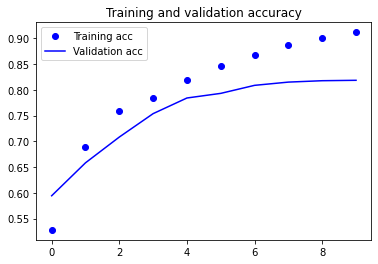

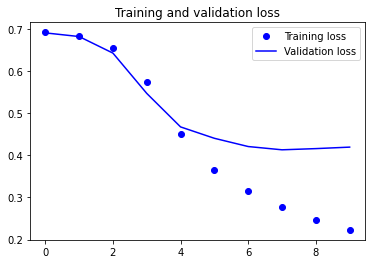

In [37]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Tokenize test data

In [39]:
test_dir = os.path.join(imdb_dir,'test')

test_labels = []
test_texts = []

for label_type in ['neg','pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name,fname))
      test_texts.append(f.read())
      f.close()
      if label_type == 'neg':
        test_labels.append(0)
      else:
        test_labels.append(1)

In [41]:
sequence = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(sequence)
y_test = np.asarray(test_labels)

In [42]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 80s 101ms/step - loss: 0.3570 - acc: 0.8436


[0.3569970428943634, 0.8436400294303894]